In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('assets/datasets/sleeping-alone-data.csv')
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
import math

In [4]:
df.head()

,StartDate,EndDate,Which of the following best describes your current relationship status?,"How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.","When both you and your partner are at home, how often do you sleep in separate beds?","When you're not sleeping in the same bed as your partner, where do you typically sleep?",Unnamed: 6,"When you're not sleeping in the same bed, where does your partner typically sleep?",Unnamed: 8,What are the reasons that you sleep in separate beds? Please select all that apply.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,When was the first time you slept in separate beds?,"To what extent do you agree with the following statement: ""sleeping in separate beds helps us to stay together.""","To what extent do you agree with the following statement: ""we sleep better when we sleep in separate beds.""","To what extent do you agree with the following statement:�_""our sex life has improved as a result of sleeping in separate beds.""�_",Which of the following best describes your current occupation?,Unnamed: 25,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,Response,Response,Response,Response,Other (please specify),Response,Other (please specify),One of us snores,One of us makes frequent bathroom trips in the...,One of us is sick,We are no longer physically intimate,We have different temperature preferences for ...,We've had an argument or fight,Not enough space,Do not want to share the covers,One of us needs to sleep with a child,Night working/very different sleeping times,Other (please specify),Response,Response,Response,Response,Response,Other (please specify),Response,Response,Response,Response,Response
1,7/10/14 18:37,7/10/14 18:39,"Single, but cohabiting with a significant other",1-5 years,Once a year or less,On the couch/chair,NaN,"My partner sleeps in our shared bed, I'm the o...",NaN,NaN,NaN,One of us is sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other (please specify),Within the first 1-5 years of our relationship,Strongly disagree,Somewhat agree,Strongly disagree,Other (please specify),Student,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific
2,7/10/14 15:54,7/10/14 15:56,"Single, but cohabiting with a significant other",1-5 years,A few times per month,"I sleep in our shared bed, my partner is the o...",NaN,Separate bedroom,NaN,One of us snores,One of us makes frequent bathroom trips in the...,One of us is sick,NaN,NaN,We've had an argument or fight,NaN,Do not want to share the covers,NaN,NaN,NaN,Immediately/ We've always slept in separate beds,Somewhat agree,Strongly agree,Strongly disagree,Healthcare Support Occupations,NaN,Male,18-29,NaN,Bachelor degree,South Atlantic
3,7/10/14 15:44,7/10/14 15:49,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Legal Occupations,NaN,Male,18-29,"$150,000+",Graduate degree,South Atlantic
4,7/10/14 13:47,7/10/14 13:47,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Life, Physical, and Social Science Occupations",NaN,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic


In [5]:
df.shape

(1094, 31)

date, a lot of questions are check if applies

In [6]:
df.columns

Index([u'StartDate', u'EndDate',
       u'Which of the following best describes your current relationship status?',
       u'How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.',
       u'When both you and your partner are at home, how often do you sleep in separate beds?',
       u'When you're not sleeping in the same bed as your partner, where do you typically sleep?',
       u'Unnamed: 6',
       u'When you're not sleeping in the same bed, where does your partner typically sleep?',
       u'Unnamed: 8',
       u'What are the reasons that you sleep in separate beds? Please select all that apply.',
       u'Unnamed: 10', u'Unnamed: 11', u'Unnamed: 12', u'Unnamed: 13',
       u'Unnamed: 14', u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17',
       u'Unnamed: 18', u'Unnamed: 19',
       u'When was the first time you slept in separate beds?',
       u'To what extent do you agree with the followi

In [ ]:
df.columns = ['StartDate', 'EndDate',
       'relationship_status',
       'relationship_duration',
       'how_often_sleep_separate',
       'not_sleeping_same_where_sleep',
       u'Unnamed: 6',
       u'When you're not sleeping in the same bed, where does your partner typically sleep?',
       u'Unnamed: 8',
       u'What are the reasons that you sleep in separate beds? Please select all that apply.',
       u'Unnamed: 10', u'Unnamed: 11', u'Unnamed: 12', u'Unnamed: 13',
       u'Unnamed: 14', u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17',
       u'Unnamed: 18', u'Unnamed: 19',
       u'When was the first time you slept in separate beds?',
       u'To what extent do you agree with the following statement: "sleeping in separate beds helps us to stay together."',
       u'To what extent do you agree with the following statement: "we sleep better when we sleep in separate beds."',
       u'To what extent do you agree with the following statement:�_"our sex life has improved as a result of sleeping in separate beds."�_',
       u'Which of the following best describes your current occupation?',
       u'Unnamed: 25', u'Gender', u'Age', u'Household Income', u'Education',
       u'Location (Census Region)']

In [9]:
df = df[1:]

In [10]:
df.iloc[:,5].value_counts()

Separate bedroom                                                              185
On the couch/chair                                                            149
I sleep in our shared bed, my partner is the one who sleeps somewhere else    106
Other (please specify)                                                         27
Shared bedroom, different bed                                                  12
Shared bedroom, but one of us sleeps on the floor                               3
Name: When you're not sleeping in the same bed as your partner, where do you typically sleep?, dtype: int64

In [14]:
df.iloc[:,5].value_counts().index

Index([u'Separate bedroom', u'On the couch/chair',
       u'I sleep in our shared bed, my partner is the one who sleeps somewhere else',
       u'Other (please specify)', u'Shared bedroom, different bed',
       u'Shared bedroom, but one of us sleeps on the floor'],
      dtype='object')

In [13]:
len(df.iloc[:,5].value_counts())

6

In [11]:
import matplotlib.pyplot as plt
% matplotlib inline

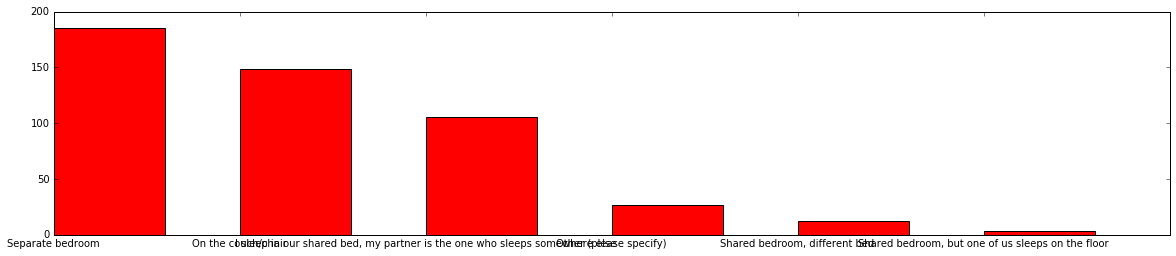

In [28]:
N = len(df.iloc[:,5].value_counts())
ind = np.arange(N)
width = 0.6

fig, ax = plt.subplots()
ax.bar(ind, df.iloc[:,5].value_counts(), width, color='r')
ax.set_xticks(ind)
ax.set_xticklabels(df.iloc[:,5].value_counts().index)
fig.set_figwidth(20)
plt.show()

In [8]:
df.iloc[:,5]

0                                                Response
1                                      On the couch/chair
2       I sleep in our shared bed, my partner is the o...
3                                                     NaN
4                                                     NaN
5                                                     NaN
6                                                     NaN
7                                                     NaN
8                                                     NaN
9                                                     NaN
10                                                    NaN
11                                                    NaN
12                                                    NaN
13                                     On the couch/chair
14                                                    NaN
15                                                    NaN
16                                       Separate bedroom
17            

In [29]:
df.ix[:,'Age'].value_counts()

45-60    312
30-44    288
> 60     283
18-29    122
Name: Age, dtype: int64

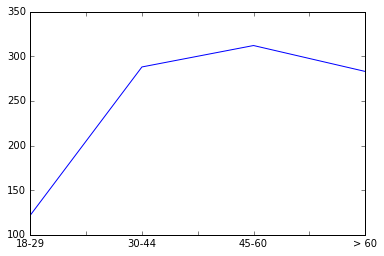

In [32]:
df.ix[:,'Age'].value_counts().sort_index().plot()

In [30]:
df.ix[:,'Household Income'].value_counts()

$50,000 - $99,999      314
$100,000 - $149,999    226
$150,000+              126
$25,000 - $49,999       99
$0 - $24,999            45
Name: Household Income, dtype: int64

In [35]:
sleep_alone = df.iloc[:,4]

In [31]:
df.iloc[:,4].value_counts()

Never                    586
Every night              147
Once a year or less      137
Once a month or less     101
A few times per month     62
A few times per week      46
Name: When both you and your partner are at home, how often do you sleep in separate beds?, dtype: int64

In [33]:
income = df['Household Income']

In [38]:
vc = income[sleep_alone == "Never"].value_counts()
vc/vc.sum()

$50,000 - $99,999      0.379953
$100,000 - $149,999    0.277389
$150,000+              0.156177
$25,000 - $49,999      0.125874
$0 - $24,999           0.060606
Name: Household Income, dtype: float64

In [39]:
income.value_counts()

$50,000 - $99,999      314
$100,000 - $149,999    226
$150,000+              126
$25,000 - $49,999       99
$0 - $24,999            45
Name: Household Income, dtype: int64

In [ ]:
income_min_max = income.str.replace('$','').str.replace(',','').